In [1]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Regression algorithms
from sklearn.ensemble import RandomForestRegressor

# Data Train-Test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# Data Saving
import pickle

# Other
import re


In [26]:
df = pd.read_csv('QuizPreTestData.csv')
df.head()

,Difficulty Level 1 Question 1,Difficulty Level 1 Question 2,Difficulty Level 1 Question 3,Difficulty Level 2 Question 1,Difficulty Level 2 Question 2,Difficulty Level 2 Question 3,Difficulty Level 3 Question 1,Difficulty Level 3 Question 2,Difficulty Level 3 Question 3,Difficulty Level 4 Question 1,Difficulty Level 4 Question 2,Difficulty Level 4 Question 3,Difficulty Level 5 Question 1,Difficulty Level 5 Question 2,Difficulty Level 5 Question 3,Total_Points,Time_Spent,Level
0,0,1,1,2,0,0,3,3,3,4,4,4,0,5,0,30,54,Level 3
1,1,0,1,0,2,0,3,0,0,0,0,0,0,0,5,12,51,Level 1
2,0,0,0,0,2,2,3,3,3,0,4,0,0,5,0,22,56,Level 2
3,0,1,1,2,0,2,0,0,0,4,0,0,5,0,5,20,40,Level 2
4,0,1,1,2,2,0,0,3,3,4,0,4,5,5,0,30,44,Level 4


In [27]:
for col in df.columns:
    print(col)
    # print(df[col])

Difficulty Level 1 Question 1
 Difficulty Level 1 Question 2
 Difficulty Level 1 Question 3
 Difficulty Level 2 Question 1
 Difficulty Level 2 Question 2
 Difficulty Level 2 Question 3
 Difficulty Level 3 Question 1
 Difficulty Level 3 Question 2
 Difficulty Level 3 Question 3
 Difficulty Level 4 Question 1
Difficulty Level 4 Question 2
 Difficulty Level 4 Question 3
 Difficulty Level 5 Question 1
 Difficulty Level 5 Question 2
 Difficulty Level 5 Question 3
Total_Points
Time_Spent
Level


In [33]:
df2 = df[['Total_Points','Time_Spent','Level']].copy()
df2.head()

,Total_Points,Time_Spent,Level
0,30,54,Level 3
1,12,51,Level 1
2,22,56,Level 2
3,20,40,Level 2
4,30,44,Level 4


In [35]:
def extract_digit(num_str):
    num = re.findall(r"[-+]?\d*\.\d+|\d+", num_str)
    return num[0]
    
df2["Level"] = pd.to_numeric(df2["Level"].apply(extract_digit))
df2.head()

,Total_Points,Time_Spent,Level
0,30,54,3
1,12,51,1
2,22,56,2
3,20,40,2
4,30,44,4


In [36]:
df2.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Total_Points,1000.0,22.580,6.290085,6.0,18.0,23.0,27.0,43.0
Time_Spent,1000.0,44.386,8.875121,30.0,36.0,45.0,52.0,59.0
Level,1000.0,2.588,0.985509,1.0,2.0,3.0,3.0,4.0


,Total_Points,Time_Spent,Level
Total_Points,1.000000,-0.026858,0.758786
Time_Spent,-0.026858,1.000000,-0.570051
Level,0.758786,-0.570051,1.000000


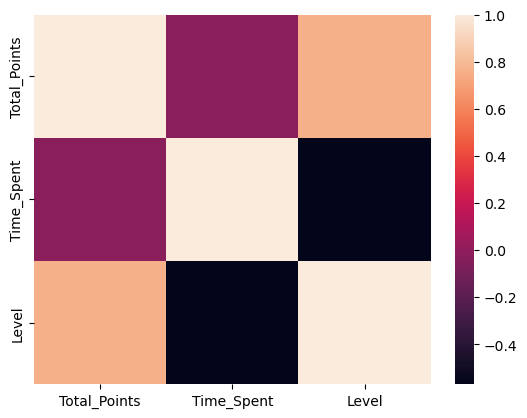

In [37]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix)
correlation_matrix

# Pre-possessing Data

In [38]:
df2.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Total_Points,1000.0,22.580,6.290085,6.0,18.0,23.0,27.0,43.0
Time_Spent,1000.0,44.386,8.875121,30.0,36.0,45.0,52.0,59.0
Level,1000.0,2.588,0.985509,1.0,2.0,3.0,3.0,4.0


In [39]:
X = df[['Total_Points','Time_Spent']].values
Y = df['Level'].values

In [40]:
scaler= StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Train Test Split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Model Training

In [42]:
def model_train(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    test_result = pd.DataFrame(data={'Y_act':Y_test, 'Y_pred':Y_pred})

    mse = metrics.mean_squared_error(test_result['Y_act'], test_result['Y_pred']) 
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(test_result['Y_act'], test_result['Y_pred']) 

    return ({   'Model Name':model_name, 
                'Model':model, 
                'Mean Squre Error':mse, 
                'Root Mean Squre Error':rmse,
                'R2 Score':r2,
            })

### Random Forest Regression

#### Hyper-parameter Tuning (n_estimators)

Maximum Accuracy of  0.982885506287227  when n_estimators is  20


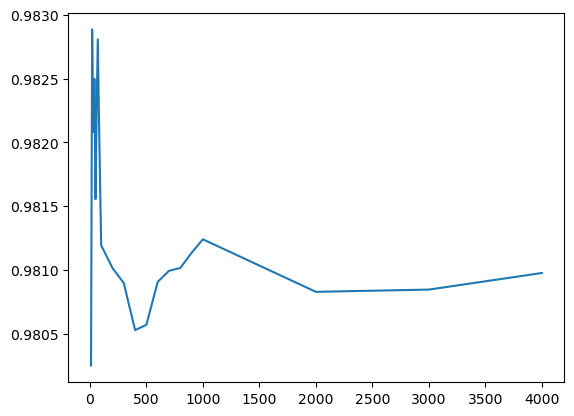

In [43]:
Acc_data = [[],[]]
for i in range(10,100,10):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=i,max_depth=10, min_samples_leaf=1, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['R2 Score'])

for i in range(100,1000,100):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=i,max_depth=10, min_samples_leaf=1, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['R2 Score'])

for i in range(1000,5000,1000):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=i,max_depth=10, min_samples_leaf=1, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['R2 Score'])

plt.plot(Acc_data[0], Acc_data[1])
peak_acc = max(Acc_data[1])
peak_ne = Acc_data[0][Acc_data[1].index(peak_acc)]
print('Maximum Accuracy of ',peak_acc,' when n_estimators is ',peak_ne)

#### Hyper-parameter Tuning (max_depth)

Maximum Accuracy of  0.980833168762409  when max_depth is  20


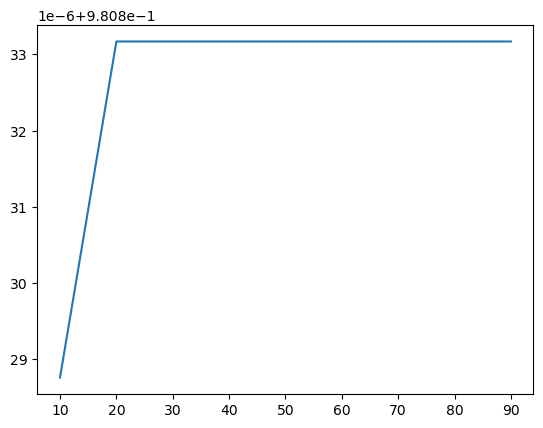

In [44]:
Acc_data = [[],[]]
for i in range(10,100,10):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=2000,max_depth=i, min_samples_leaf=1, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['R2 Score'])

plt.plot(Acc_data[0], Acc_data[1])
peak_acc = max(Acc_data[1])
peak_md = Acc_data[0][Acc_data[1].index(peak_acc)]
print('Maximum Accuracy of ',peak_acc,' when max_depth is ',peak_md)

#### Hyper-parameter Tuning (min_samples_leaf)

Maximum Accuracy of  0.980833168762409  when min_samples_leaf is  1


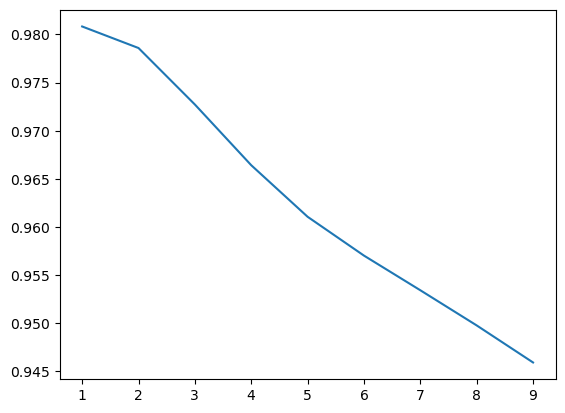

In [45]:
Acc_data = [[],[]]
for i in range(1,10,1):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=2000,max_depth=30, min_samples_leaf=i, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['R2 Score'])

plt.plot(Acc_data[0], Acc_data[1])
peak_acc = max(Acc_data[1])
peak_msl = Acc_data[0][Acc_data[1].index(peak_acc)]
print('Maximum Accuracy of ',peak_acc,' when min_samples_leaf is ',peak_msl)

#### Training Optimized Model

In [46]:
final_model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=20,max_depth=20, min_samples_leaf=1, random_state=3), 'Random Forest Regressor', X_train, Y_train, X_test, Y_test)
print(final_model)

{'Model Name': 'Random Forest Regressor', 'Model': RandomForestRegressor(max_depth=20, n_estimators=20, n_jobs=3, random_state=3), 'Mean Squre Error': 0.0161625, 'Root Mean Squre Error': 0.1271318213509112, 'R2 Score': 0.982885506287227}


# Saving Model and Pre-processing Data

In [48]:
object_list = [scaler, final_model['Model']]
open_file = open("Data/Model_Data.pkl", "wb")
pickle.dump(object_list, open_file)
open_file.close()